In [50]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
# data = pd.read_csv('../input/timeseries/Train_SU63ISt.csv')
# data.head()

!wget https://s3.amazonaws.com/capitalbikeshare-data/2017-capitalbikeshare-tripdata.zip


y
--2020-12-04 07:21:37--  https://s3.amazonaws.com/capitalbikeshare-data/2017-capitalbikeshare-tripdata.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.1.6
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.1.6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 89576218 (85M) [application/zip]
Saving to: ‘2017-capitalbikeshare-tripdata.zip.2’

2017-capitalbikesha 100%[===================>]  85.43M  15.6MB/s    in 6.7s    

2020-12-04 07:21:45 (12.7 MB/s) - ‘2017-capitalbikeshare-tripdata.zip.2’ saved [89576218/89576218]



In [53]:
!unzip 2017-capitalbikeshare-tripdata.zip

Archive:  2017-capitalbikeshare-tripdata.zip
replace 2017Q1-capitalbikeshare-tripdata.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: 2017Q1-capitalbikeshare-tripdata.csv  
replace 2017Q2-capitalbikeshare-tripdata.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: 2017Q2-capitalbikeshare-tripdata.csv  
replace 2017Q3-capitalbikeshare-tripdata.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: 2017Q3-capitalbikeshare-tripdata.csv  
replace 2017Q4-capitalbikeshare-tripdata.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: 2017Q4-capitalbikeshare-tripdata.csv  


In [54]:
!ls

2017-capitalbikeshare-tripdata.zip    2017Q2-capitalbikeshare-tripdata.csv
2017-capitalbikeshare-tripdata.zip.1  2017Q3-capitalbikeshare-tripdata.csv
2017-capitalbikeshare-tripdata.zip.2  2017Q4-capitalbikeshare-tripdata.csv
2017Q1-capitalbikeshare-tripdata.csv  sample_data


In [55]:
data = pd.read_csv('2017Q1-capitalbikeshare-tripdata.csv')
# data_q1 = pd.read_csv('../input/trip-history-2017/2017Q1-capitalbikeshare-tripdata.csv')
# data_q2 = pd.read_csv('../input/trip-history-2017/2017Q2-capitalbikeshare-tripdata.csv')
# data_q3 = pd.read_csv('../input/trip-history-2017/2017Q3-capitalbikeshare-tripdata.csv')
# data_q4 = pd.read_csv('../input/trip-history-2017/2017Q4-capitalbikeshare-tripdata.csv')

In [56]:
# data_q1.head()

In [57]:
# data_q2.head()

In [58]:
# data=pd.concat([data_q1,data_q2,data_q3,data_q4], ignore_index=True)
# data=pd.concat([data_q1,data_q2], ignore_index=True)
data.head()

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,221,2017-01-01 00:00:41,2017-01-01 00:04:23,31634,3rd & Tingey St SE,31208,M St & New Jersey Ave SE,W00869,Member
1,1676,2017-01-01 00:06:53,2017-01-01 00:34:49,31258,Lincoln Memorial,31270,8th & D St NW,W00894,Casual
2,1356,2017-01-01 00:07:10,2017-01-01 00:29:47,31289,Henry Bacon Dr & Lincoln Memorial Circle NW,31222,New York Ave & 15th St NW,W21945,Casual
3,1327,2017-01-01 00:07:22,2017-01-01 00:29:30,31289,Henry Bacon Dr & Lincoln Memorial Circle NW,31222,New York Ave & 15th St NW,W20012,Casual
4,1636,2017-01-01 00:07:36,2017-01-01 00:34:52,31258,Lincoln Memorial,31270,8th & D St NW,W22786,Casual


In [59]:
data.shape

(646510, 9)

In [60]:
data[data['End date']<data['Start date']]

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type


In [61]:
data = data[data['End date']>=data['Start date']]
len(data)

646510

In [62]:
data.dtypes

Duration                 int64
Start date              object
End date                object
Start station number     int64
Start station           object
End station number       int64
End station             object
Bike number             object
Member type             object
dtype: object

In [63]:
data['Start date']= pd.to_datetime(data['Start date'],format='%Y-%m-%d %H:%M:%S')
data['End date']= pd.to_datetime(data['End date'],format='%Y-%m-%d %H:%M:%S')


In [64]:
data.dtypes

Duration                         int64
Start date              datetime64[ns]
End date                datetime64[ns]
Start station number             int64
Start station                   object
End station number               int64
End station                     object
Bike number                     object
Member type                     object
dtype: object

In [65]:
data['Start_year'] = data['Start date'].dt.year
data['Start_month'] = data['Start date'].dt.month
data['Start_day'] = data['Start date'].dt.day
data['Start_hour'] = data['Start date'].dt.hour
data['Start_minute'] = data['Start date'].dt.minute
data['Start_second']  =data['Start date'].dt.second

In [66]:
data['End_year'] = data['End date'].dt.year
data['End_month'] = data['End date'].dt.month
data['End_day'] = data['End date'].dt.day
data['End_hour'] = data['End date'].dt.hour
data['End_minute'] = data['End date'].dt.minute
data['End_second']  =data['End date'].dt.second

In [67]:
data.head(5)

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,Start_year,Start_month,Start_day,Start_hour,Start_minute,Start_second,End_year,End_month,End_day,End_hour,End_minute,End_second
0,221,2017-01-01 00:00:41,2017-01-01 00:04:23,31634,3rd & Tingey St SE,31208,M St & New Jersey Ave SE,W00869,Member,2017,1,1,0,0,41,2017,1,1,0,4,23
1,1676,2017-01-01 00:06:53,2017-01-01 00:34:49,31258,Lincoln Memorial,31270,8th & D St NW,W00894,Casual,2017,1,1,0,6,53,2017,1,1,0,34,49
2,1356,2017-01-01 00:07:10,2017-01-01 00:29:47,31289,Henry Bacon Dr & Lincoln Memorial Circle NW,31222,New York Ave & 15th St NW,W21945,Casual,2017,1,1,0,7,10,2017,1,1,0,29,47
3,1327,2017-01-01 00:07:22,2017-01-01 00:29:30,31289,Henry Bacon Dr & Lincoln Memorial Circle NW,31222,New York Ave & 15th St NW,W20012,Casual,2017,1,1,0,7,22,2017,1,1,0,29,30
4,1636,2017-01-01 00:07:36,2017-01-01 00:34:52,31258,Lincoln Memorial,31270,8th & D St NW,W22786,Casual,2017,1,1,0,7,36,2017,1,1,0,34,52


(array([6.42252e+05, 3.30000e+03, 3.85000e+02, 1.42000e+02, 8.40000e+01,
        7.90000e+01, 8.00000e+01, 4.50000e+01, 6.90000e+01, 7.40000e+01]),
 array([6.00000e+01, 8.66060e+03, 1.72612e+04, 2.58618e+04, 3.44624e+04,
        4.30630e+04, 5.16636e+04, 6.02642e+04, 6.88648e+04, 7.74654e+04,
        8.60660e+04]),
 <a list of 10 Patch objects>)

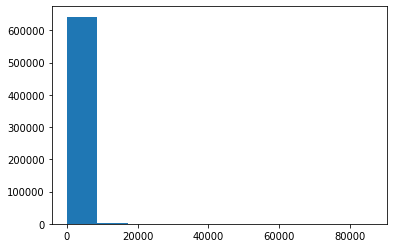

In [68]:
plt.hist(data['Duration'])

In [69]:
data.Duration.mean()

1010.4449490340444

In [70]:
data['Member type'].unique()

array(['Member', 'Casual'], dtype=object)

In [71]:
data=data.drop(columns=['Start_year','End_year'])

In [72]:
data.head()

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,Start_month,Start_day,Start_hour,Start_minute,Start_second,End_month,End_day,End_hour,End_minute,End_second
0,221,2017-01-01 00:00:41,2017-01-01 00:04:23,31634,3rd & Tingey St SE,31208,M St & New Jersey Ave SE,W00869,Member,1,1,0,0,41,1,1,0,4,23
1,1676,2017-01-01 00:06:53,2017-01-01 00:34:49,31258,Lincoln Memorial,31270,8th & D St NW,W00894,Casual,1,1,0,6,53,1,1,0,34,49
2,1356,2017-01-01 00:07:10,2017-01-01 00:29:47,31289,Henry Bacon Dr & Lincoln Memorial Circle NW,31222,New York Ave & 15th St NW,W21945,Casual,1,1,0,7,10,1,1,0,29,47
3,1327,2017-01-01 00:07:22,2017-01-01 00:29:30,31289,Henry Bacon Dr & Lincoln Memorial Circle NW,31222,New York Ave & 15th St NW,W20012,Casual,1,1,0,7,22,1,1,0,29,30
4,1636,2017-01-01 00:07:36,2017-01-01 00:34:52,31258,Lincoln Memorial,31270,8th & D St NW,W22786,Casual,1,1,0,7,36,1,1,0,34,52


In [73]:
len(data['Bike number'].unique()) == len(data)

False

In [74]:
data.groupby(data['Member type']).size()

Member type
Casual    118076
Member    528434
dtype: int64

In [75]:
data.dtypes

Duration                         int64
Start date              datetime64[ns]
End date                datetime64[ns]
Start station number             int64
Start station                   object
End station number               int64
End station                     object
Bike number                     object
Member type                     object
Start_month                      int64
Start_day                        int64
Start_hour                       int64
Start_minute                     int64
Start_second                     int64
End_month                        int64
End_day                          int64
End_hour                         int64
End_minute                       int64
End_second                       int64
dtype: object

In [76]:
for l in data:
#     print(data[l].dtype)
    if(data[l].dtype=='object'):
        data[l]= data[l].astype('category')
        data[l]= data[l].cat.codes
data.dtypes

Duration                         int64
Start date              datetime64[ns]
End date                datetime64[ns]
Start station number             int64
Start station                    int16
End station number               int64
End station                      int16
Bike number                      int16
Member type                       int8
Start_month                      int64
Start_day                        int64
Start_hour                       int64
Start_minute                     int64
Start_second                     int64
End_month                        int64
End_day                          int64
End_hour                         int64
End_minute                       int64
End_second                       int64
dtype: object

In [77]:
data.head()

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,Start_month,Start_day,Start_hour,Start_minute,Start_second,End_month,End_day,End_hour,End_minute,End_second
0,221,2017-01-01 00:00:41,2017-01-01 00:04:23,31634,122,31208,294,737,1,1,1,0,0,41,1,1,0,4,23
1,1676,2017-01-01 00:06:53,2017-01-01 00:34:49,31258,289,31270,147,759,0,1,1,0,6,53,1,1,0,34,49
2,1356,2017-01-01 00:07:10,2017-01-01 00:29:47,31289,262,31222,336,3041,0,1,1,0,7,10,1,1,0,29,47
3,1327,2017-01-01 00:07:22,2017-01-01 00:29:30,31289,262,31222,336,1300,0,1,1,0,7,22,1,1,0,29,30
4,1636,2017-01-01 00:07:36,2017-01-01 00:34:52,31258,289,31270,147,3828,0,1,1,0,7,36,1,1,0,34,52


In [78]:
data[data['Start station number']==31634]

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,Start_month,Start_day,Start_hour,Start_minute,Start_second,End_month,End_day,End_hour,End_minute,End_second
0,221,2017-01-01 00:00:41,2017-01-01 00:04:23,31634,122,31208,294,737,1,1,1,0,0,41,1,1,0,4,23
831,799,2017-01-01 11:54:18,2017-01-01 12:07:37,31634,122,31612,213,2973,1,1,1,11,54,18,1,1,12,7,37
836,791,2017-01-01 11:54:29,2017-01-01 12:07:41,31634,122,31612,213,3916,1,1,1,11,54,29,1,1,12,7,41
942,178,2017-01-01 12:16:49,2017-01-01 12:19:48,31634,122,31628,77,3835,1,1,1,12,16,49,1,1,12,19,48
2546,97,2017-01-01 15:34:41,2017-01-01 15:36:19,31634,122,31634,122,309,1,1,1,15,34,41,1,1,15,36,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645812,830,2017-03-31 18:50:20,2017-03-31 19:04:11,31634,122,31804,159,3369,1,3,31,18,50,20,3,31,19,4,11
646022,648,2017-03-31 20:05:59,2017-03-31 20:16:48,31634,122,31616,119,1769,1,3,31,20,5,59,3,31,20,16,48
646062,497,2017-03-31 20:19:58,2017-03-31 20:28:16,31634,122,31244,129,1046,1,3,31,20,19,58,3,31,20,28,16
646390,362,2017-03-31 22:39:57,2017-03-31 22:46:00,31634,122,31108,131,3056,1,3,31,22,39,57,3,31,22,46,0


In [79]:
data.groupby('Start station number')['Start station'].count().max()

13712

In [80]:
data.groupby('Start station')['Start station number'].count().max()

13712

In [81]:
data.head()

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,Start_month,Start_day,Start_hour,Start_minute,Start_second,End_month,End_day,End_hour,End_minute,End_second
0,221,2017-01-01 00:00:41,2017-01-01 00:04:23,31634,122,31208,294,737,1,1,1,0,0,41,1,1,0,4,23
1,1676,2017-01-01 00:06:53,2017-01-01 00:34:49,31258,289,31270,147,759,0,1,1,0,6,53,1,1,0,34,49
2,1356,2017-01-01 00:07:10,2017-01-01 00:29:47,31289,262,31222,336,3041,0,1,1,0,7,10,1,1,0,29,47
3,1327,2017-01-01 00:07:22,2017-01-01 00:29:30,31289,262,31222,336,1300,0,1,1,0,7,22,1,1,0,29,30
4,1636,2017-01-01 00:07:36,2017-01-01 00:34:52,31258,289,31270,147,3828,0,1,1,0,7,36,1,1,0,34,52


In [82]:
data= data.drop(columns=['Start date','End date','Start station','End station'])
data.head()

,Duration,Start station number,End station number,Bike number,Member type,Start_month,Start_day,Start_hour,Start_minute,Start_second,End_month,End_day,End_hour,End_minute,End_second
0,221,31634,31208,737,1,1,1,0,0,41,1,1,0,4,23
1,1676,31258,31270,759,0,1,1,0,6,53,1,1,0,34,49
2,1356,31289,31222,3041,0,1,1,0,7,10,1,1,0,29,47
3,1327,31289,31222,1300,0,1,1,0,7,22,1,1,0,29,30
4,1636,31258,31270,3828,0,1,1,0,7,36,1,1,0,34,52


In [83]:
# data['Quarter']=0
# data.head()

In [84]:
# data.loc[(data['Start_month']>=1) & (data['Start_month']<=3),'Quarter']=1

In [85]:
# data.loc[(data['Start_month']>=4) & (data['Start_month']<=6),'Quarter']=2
# data.loc[(data['Start_month']>=7) & (data['Start_month']<=9),'Quarter']=3
# data.loc[(data['Start_month']>=10) & (data['Start_month']<=12),'Quarter']=4


# data.head()

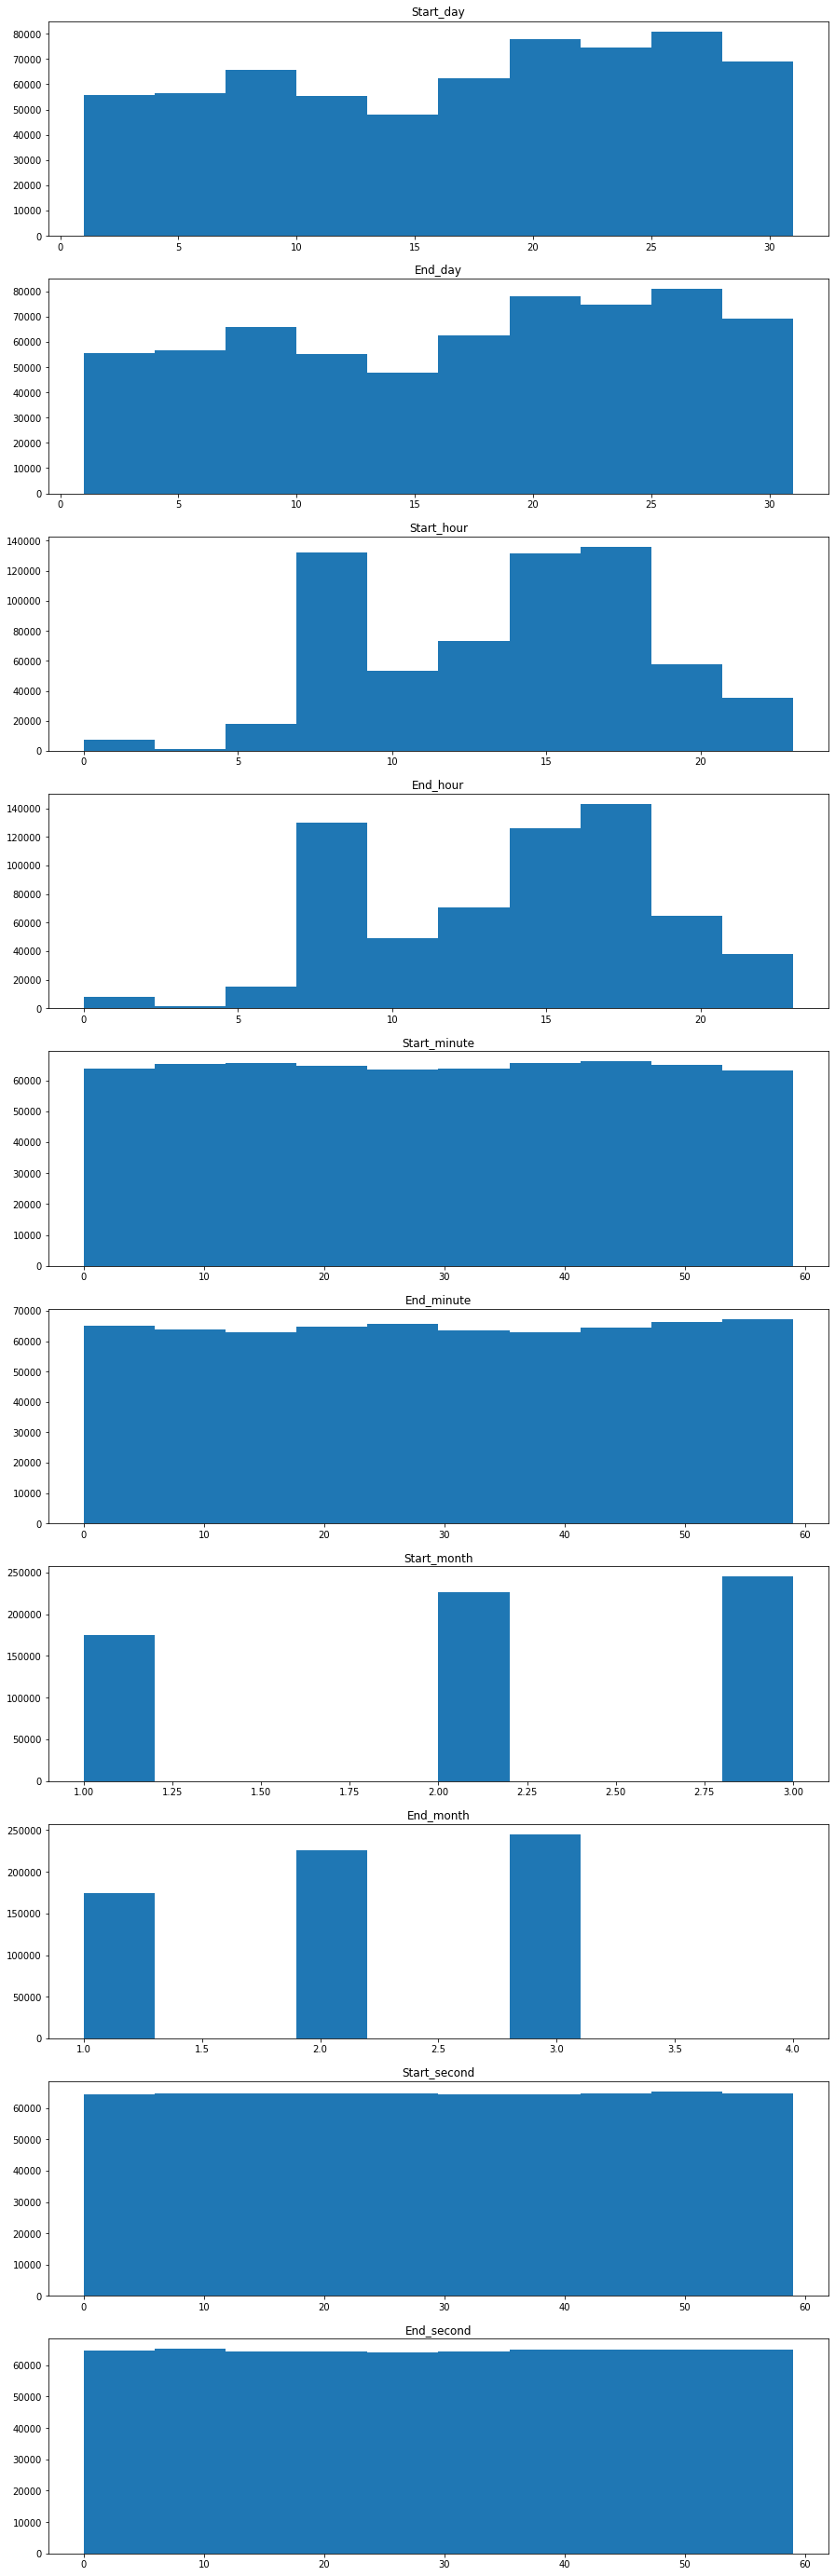

In [86]:
fig,(ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10) = plt.subplots(10,1,figsize=(15,50))
ax1.hist(data['Start_day'])
ax1.set_title("Start_day")
ax2.hist(data['End_day'])
ax2.set_title("End_day")
ax3.hist(data['Start_hour'])
ax3.set_title("Start_hour")
ax4.hist(data['End_hour'])
ax4.set_title("End_hour")
ax5.hist(data['Start_minute'])
ax5.set_title("Start_minute")
ax6.hist(data['End_minute'])
ax6.set_title("End_minute")
ax7.hist(data['Start_month'])
ax7.set_title("Start_month")
ax8.hist(data['End_month'])
ax8.set_title("End_month")
ax9.hist(data['Start_second'])
ax9.set_title("Start_second")
ax10.hist(data['End_second'])
ax10.set_title("End_second")

plt.show()

In [87]:
data =data.drop(columns=['Start_day','End_day','Start_minute','End_minute','Start_second','End_second'])


In [88]:
data.head()

,Duration,Start station number,End station number,Bike number,Member type,Start_month,Start_hour,End_month,End_hour
0,221,31634,31208,737,1,1,0,1,0
1,1676,31258,31270,759,0,1,0,1,0
2,1356,31289,31222,3041,0,1,0,1,0
3,1327,31289,31222,1300,0,1,0,1,0
4,1636,31258,31270,3828,0,1,0,1,0


In [89]:
# data = pd.get_dummies(data,columns=['Start station number','End station number','Bike number'],sparse=True)
# data.head()

In [90]:
data.shape

(646510, 9)

In [91]:
X  = data.drop(columns=['Member type'])
y = data['Member type']

In [92]:
X.head()

,Duration,Start station number,End station number,Bike number,Start_month,Start_hour,End_month,End_hour
0,221,31634,31208,737,1,0,1,0
1,1676,31258,31270,759,1,0,1,0
2,1356,31289,31222,3041,1,0,1,0
3,1327,31289,31222,1300,1,0,1,0
4,1636,31258,31270,3828,1,0,1,0


In [93]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: Member type, dtype: int8

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [96]:
from sklearn.metrics import accuracy_score

In [97]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
models = []

# models.append(("LogisticRegression",LogisticRegression()))
# models.append(("SVC",SVC()))
# models.append(("LinearSVC",LinearSVC()))
# models.append(("KNeighbors",KNeighborsClassifier()))
models.append(("DecisionTree",DecisionTreeClassifier()))
models.append(("RandomForest",RandomForestClassifier()))
rf2 = RandomForestClassifier(n_estimators=100, criterion='gini',max_depth=10, random_state=0, max_features=None)
models.append(("RandomForest2",rf2))
models.append(("XGBoost",XGBClassifier()))
results = []
names = []
for name,model in models:
    result = cross_val_score(model, X_train, y_train,  cv=3)
    names.append(name)
    results.append(result)

for i in range(len(names)):
    print(names[i],results[i].mean())

DecisionTree 0.8473650832933751
RandomForest 0.9018886018777744
RandomForest2 0.8932911581671849
XGBoost 0.895093141121818


In [98]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print('Accuracy = ',accuracy_score(y_pred,y_test))

Accuracy =  0.9049744010146789
